<a href="https://colab.research.google.com/github/kdhenderson/msds_colab_notebooks/blob/main/ML2_wk5_UCI_Wine_TF_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import urllib.request

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf

# URL of the UCI Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Open the URL and read the data
response = urllib.request.urlopen(url)
csvreader = csv.reader(response.read().decode('utf-8').splitlines())

data = [list(map(float, row)) for row in csvreader]

cols = ['class_label', 'alcohol', 'malic_acid', 'ash',
          'alcalinity_of_ash', 'magnesium', 'total_pphenols',
          'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
          'color_intensity', 'hue', 'OD280/OD315_of_diluted_wines',
          'proline']


In [ ]:
response = urllib.request.urlopen(url)
csvreader = csv.reader(response.read().decode('utf-8').splitlines())
data2 = [[float(entry) for entry in row] for row in csvreader]

print(data2 == data)

True


In [ ]:
from collections import Counter

Counter([x[0] for x in data])

Counter({1.0: 59, 2.0: 71, 3.0: 48})

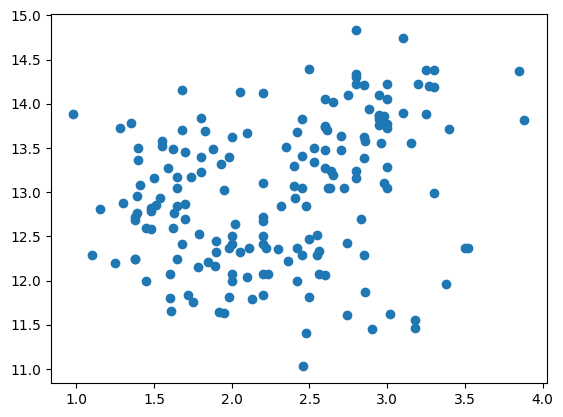

In [ ]:
y = [x[0]-1 for x in data]
#y_bin = [0 if x ==1 else 1 for x in data]
X = [x[1:] for x in data] #needed?

import matplotlib.pyplot as plt
plt.scatter([x[5] for x in X],[x[0] for x in X])
plt.show()
#plt.hist([x[2] for x in X])
#plt.show()

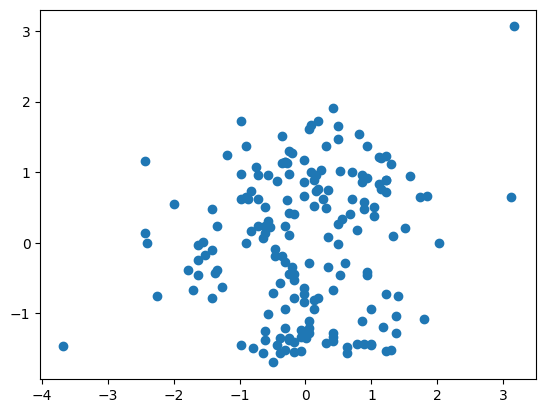

In [ ]:
#binary
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter([x[2] for x in X_scaled],[x[6] for x in X_scaled])
plt.show()

In [ ]:
### Binary classifcaiton
y = [x[0]-1 for x in data]
y_bin = [0 if x==0 else 1 for x in data]
X = [x[1:] for x in data]

#binary
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bin, test_size=0.3)

# Convert to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
    ])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tf, y_train_tf, epochs=200, batch_size=16, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tf, y_test_tf, verbose=0)
accuracy




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0.4444444477558136

In [ ]:
#scaler = StandardScaler()
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#scaler.fit(X_train)
#X_scaled =scaler.transform(X_train)
#X_test = scaler.transform(X_test)


In [ ]:
# Multiclass

from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)


# One-hot encode the labels for multi-class classification
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Multi-class logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=y_train_encoded.shape[1], activation='softmax', input_shape=(X_train.shape[1],))
    ])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=200, batch_size=16, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(accuracy)

0.9814814925193787


In [ ]:
model.predict(X_test[2:3])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([0.4074359 , 0.59192306, 0.00064106], dtype=float32)

In [ ]:
y_test_encoded[2]

array([0., 1., 0.])

In [ ]:
# now with NN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(units=y_train_encoded.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=100, batch_size=16, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(accuracy)

1.0


In [ ]:
# Remember

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, y_train)
clf.score(X_test,y_test)

1.0

In [ ]:
clf.predict_proba(X_test[0:1])


array([[0.  , 0.99, 0.01]])

In [ ]:
list(zip(cols[1:], clf.feature_importances_))

[('alcohol', 0.13361790683346822),
 ('malic_acid', 0.016447658249549052),
 ('ash', 0.008605835323201269),
 ('alcalinity_of_ash', 0.02709853162527466),
 ('magnesium', 0.025075671569019572),
 ('total_pphenols', 0.0638014813701871),
 ('flavanoids', 0.14092642862942883),
 ('nonflavanoid_phenols', 0.01605538564880121),
 ('proanthocyanins', 0.018905355796803306),
 ('color_intensity', 0.20775124228269554),
 ('hue', 0.076828805983112),
 ('OD280/OD315_of_diluted_wines', 0.11414351279625184),
 ('proline', 0.15074218389220748)]

(array([6., 0., 1., 1., 0., 1., 2., 1., 0., 1.]),
 array([0.00860584, 0.02852038, 0.04843492, 0.06834946, 0.088264  ,
        0.10817854, 0.12809308, 0.14800762, 0.16792216, 0.1878367 ,
        0.20775124]),
 <BarContainer object of 10 artists>)

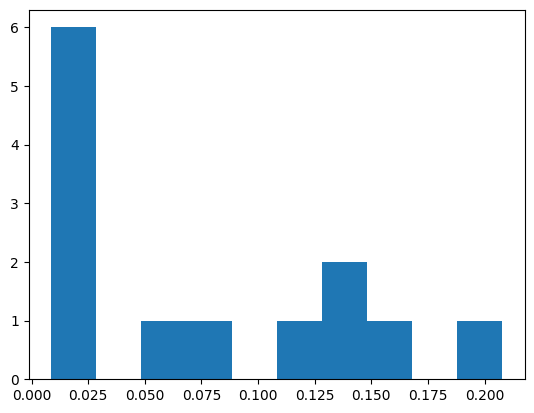

In [ ]:
plt.hist(clf.feature_importances_)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from urllib.request import urlopen

# Load data from UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
raw_data = urlopen(url).read().decode('utf-8')

# Convert data to numpy array
data = np.array([line.split(',') for line in raw_data.strip().split('\n')]).astype(np.float32)

# Split data into features and labels
X = data[:, 1:]  # Features
y = data[:, 0] - 1  # Labels, subtract 1 to make labels start from 0

# Convert labels to one-hot encoding
y = to_categorical(y)

# Split data into training and testing sets
np.random.seed(42)  # For reproducibility
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

split = int(0.8 * len(X))  # 80% of data for training
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define a Sequential model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")
